# Модель для предсказания наличия/отсутствия insomnia и apnea 


In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uom190346a/sleep-health-and-lifestyle-dataset")


df = pd.read_csv(path+'/Sleep_health_and_lifestyle_dataset.csv')
df = df.drop(columns=['Blood Pressure', 'Stress Level', 'Quality of Sleep', 'Occupation'])

In [ ]:
df

,Person ID,Gender,Age,Sleep Duration,Physical Activity Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,6.1,42,Overweight,77,4200,NaN
1,2,Male,28,6.2,60,Normal,75,10000,NaN
2,3,Male,28,6.2,60,Normal,75,10000,NaN
3,4,Male,28,5.9,30,Obese,85,3000,Sleep Apnea
4,5,Male,28,5.9,30,Obese,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...
369,370,Female,59,8.1,75,Overweight,68,7000,Sleep Apnea
370,371,Female,59,8.0,75,Overweight,68,7000,Sleep Apnea
371,372,Female,59,8.1,75,Overweight,68,7000,Sleep Apnea
372,373,Female,59,8.1,75,Overweight,68,7000,Sleep Apnea


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Sleep Duration           374 non-null    float64
 4   Physical Activity Level  374 non-null    int64  
 5   BMI Category             374 non-null    object 
 6   Heart Rate               374 non-null    int64  
 7   Daily Steps              374 non-null    int64  
 8   Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(5), object(3)
memory usage: 26.4+ KB


In [ ]:
df.describe()

,Person ID,Age,Sleep Duration,Physical Activity Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,59.171123,70.165775,6816.844920
std,108.108742,8.673133,0.795657,20.830804,4.135676,1617.915679
min,1.000000,27.000000,5.800000,30.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,45.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,60.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,75.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,90.000000,86.000000,10000.000000


In [ ]:
bmi_encoder = preprocessing.LabelEncoder()
sleep_encoder = preprocessing.LabelEncoder()
gender_encoder = preprocessing.LabelEncoder()

df['BMI Category'] = bmi_encoder.fit_transform(df['BMI Category'])
df['Sleep Disorder'] = sleep_encoder.fit_transform(df['Sleep Disorder'])
df['Gender'] = gender_encoder.fit_transform(df['Gender'])
df.head()



,Person ID,Gender,Age,Sleep Duration,Physical Activity Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
0,1,1,27,6.1,42,3,77,4200,2
1,2,1,28,6.2,60,0,75,10000,2
2,3,1,28,6.2,60,0,75,10000,2
3,4,1,28,5.9,30,2,85,3000,1
4,5,1,28,5.9,30,2,85,3000,1


In [ ]:
# Outlier Removal
num_col = ['Age', 'Sleep Duration', 'Physical Activity Level',
           'Heart Rate', 'Daily Steps']

Q1 = df[num_col].quantile(0.25)
Q3 = df[num_col].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[num_col] < (Q1 - 1.5 * IQR)) | (df[num_col] > (Q3 + 1.5 * IQR))).any(axis=1)]


# Prediction time!

In [ ]:
from sklearn.model_selection import train_test_split

# Prepare the data

In [ ]:
# Prepare the data
X = df.drop(['Person ID', 'Sleep Disorder'], axis=1)
y = df['Sleep Disorder']

# Split the data into train and test sets

In [ ]:
X

,Gender,Age,Sleep Duration,Physical Activity Level,BMI Category,Heart Rate,Daily Steps
0,1,27,6.1,42,3,77,4200
1,1,28,6.2,60,0,75,10000
2,1,28,6.2,60,0,75,10000
7,1,29,7.8,75,0,70,8000
8,1,29,7.8,75,0,70,8000
...,...,...,...,...,...,...,...
369,0,59,8.1,75,3,68,7000
370,0,59,8.0,75,3,68,7000
371,0,59,8.1,75,3,68,7000
372,0,59,8.1,75,3,68,7000


In [ ]:
y

0      2
1      2
2      2
7      2
8      2
      ..
369    1
370    1
371    1
372    1
373    1
Name: Sleep Disorder, Length: 359, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Create a pipeline

In [ ]:
# Модель логистической регрессии с масштабированием признаков

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier



logreg_pipeline = Pipeline([
    # ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier())
])

logreg_pipeline.fit(X_train, y_train)
y_pred_logreg = logreg_pipeline.predict(X_test)

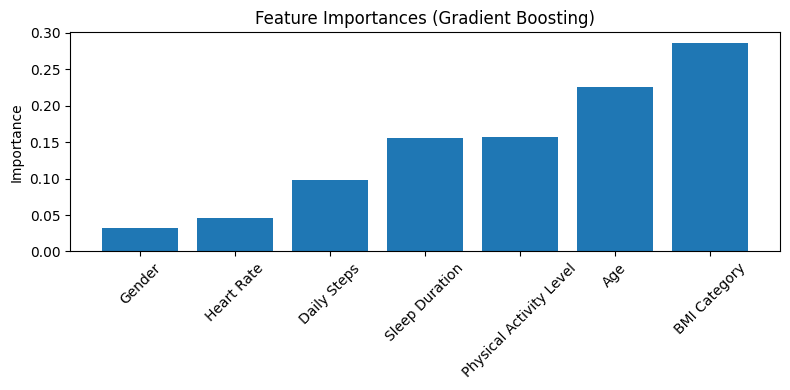

Classification report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       1.00      0.79      0.88        14
           2       0.91      0.98      0.94        43

    accuracy                           0.92        72
   macro avg       0.93      0.88      0.90        72
weighted avg       0.92      0.92      0.92        72



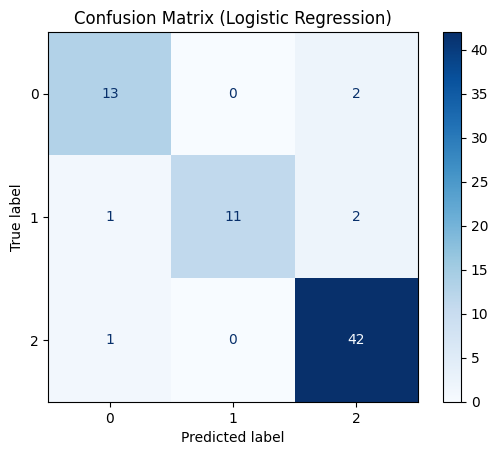

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Визуализация весов параметров логистической регрессии
import matplotlib.pyplot as plt

# Получаем важности признаков для GradientBoostingClassifier
importances = logreg_pipeline.named_steps['clf'].feature_importances_
feature_names = X.columns


sorted_idx = np.argsort(importances)
plt.figure(figsize=(8, 4))
plt.bar(np.array(feature_names)[sorted_idx], importances[sorted_idx])
plt.title('Feature Importances (Gradient Boosting)')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Метрики качества
print("Classification report:\n", classification_report(y_test, y_pred_logreg))

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred_logreg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()



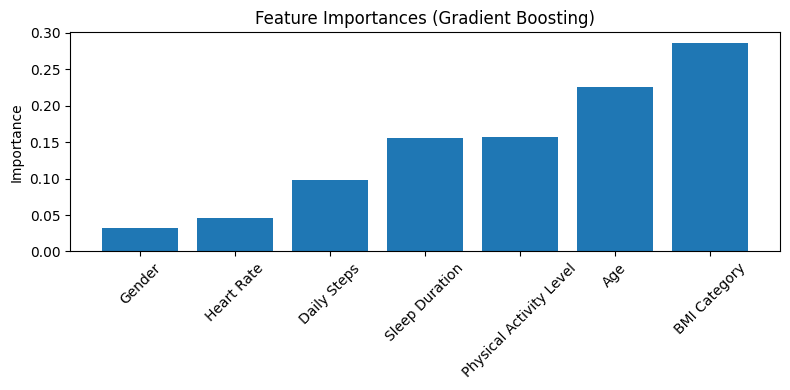

In [ ]:
# Отсортированные значения важности признаков
sorted_idx = np.argsort(importances)
plt.figure(figsize=(8, 4))
plt.bar(np.array(X.columns)[sorted_idx], importances[sorted_idx])
plt.title('Feature Importances (Gradient Boosting)')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Генерация случайного тестового сэмпла по каждому признаку отдельно
gender = np.random.randint(0, 2)  # Gender: 0 - Female, 1 - Male
print(f"Gender (0=Female, 1=Male): {gender}")

age = np.random.randint(X['Age'].min(), X['Age'].max() + 1)
print(f"Age: {age}")

sleep_duration = np.random.uniform(X['Sleep Duration'].min(), X['Sleep Duration'].max())
print(f"Sleep Duration (hours): {sleep_duration:.2f}")

physical_activity = np.random.randint(X['Physical Activity Level'].min(), X['Physical Activity Level'].max() + 1)
print(f"Physical Activity Level (minutes/day): {physical_activity}")

bmi_category = np.random.randint(X['BMI Category'].min(), X['BMI Category'].max() + 1)
print(f"BMI Category (encoded): {bmi_category}")

heart_rate = np.random.randint(X['Heart Rate'].min(), X['Heart Rate'].max() + 1)
print(f"Heart Rate (bpm): {heart_rate}")

daily_steps = np.random.randint(X['Daily Steps'].min(), X['Daily Steps'].max() + 1)
print(f"Daily Steps: {daily_steps}")

# Собираем все параметры в массив для предсказания
sample = np.array([[gender, age, sleep_duration, physical_activity, bmi_category, heart_rate, daily_steps]])

# Предсказание
random_pred = logreg_pipeline.named_steps['clf'].predict(sample)
# Используем sleep_encoder для обратного преобразования, если класс встречался при обучении
if all(label in sleep_encoder.classes_ for label in random_pred):
    random_pred_text = sleep_encoder.inverse_transform(random_pred)
    print("Предсказание логистической регрессии для случайных данных:", random_pred_text[0])
else:
    # Если класс не встречался, выводим числовое значение
    print("Предсказание логистической регрессии для случайных данных (код):", random_pred[0])

probas = logreg_pipeline.named_steps['clf'].predict_proba(sample)
for label, prob in zip(sleep_encoder.classes_, probas[0]):
    print(f"{label}: {prob:.3f}")


# Предсказание
random_pred = logreg_pipeline.named_steps['clf'].predict(sample)
# Преобразуем числовой код в название диагноза
diagnosis_name = sleep_encoder.inverse_transform(random_pred)
print("Предсказание логистической регрессии для случайных данных:", diagnosis_name[0])


Gender (0=Female, 1=Male): 1
Age: 30
Sleep Duration (hours): 7.75
Physical Activity Level (minutes/day): 59
BMI Category (encoded): 3
Heart Rate (bpm): 73
Daily Steps: 9521
Предсказание логистической регрессии для случайных данных (код): 2
Insomnia: 0.159
Sleep Apnea: 0.119
nan: 0.722
Предсказание логистической регрессии для случайных данных: nan


In [ ]:
import pickle

# Сохраняем обученную модель и все энкодеры в один файл
with open('insomnia_apnea.pkl', 'wb') as f:
    pickle.dump({
        'model': logreg_pipeline,
        'sleep_encoder': sleep_encoder,
        'bmi_encoder': bmi_encoder,
        'gender_encoder': gender_encoder
    }, f)


In [ ]:
import numpy as np
import json
# Генерация случайных данных для прогноза

gender = np.random.randint(0, 2)
age = np.random.randint(1, X['Age'].max() + 1)
sleep_duration = np.random.uniform(X['Sleep Duration'].min(), X['Sleep Duration'].max())

# sleep_duration = np.random.uniform(1, 4)
physical_activity = np.random.randint(X['Physical Activity Level'].min(), X['Physical Activity Level'].max() + 1)
# physical_activity = np.random.randint(0, 5)
bmi_category = np.random.randint(X['BMI Category'].min(), X['BMI Category'].max() + 1)
# heart_rate = np.random.randint(X['Heart Rate'].min(), X['Heart Rate'].max() + 1)
# heart_rate = 50
daily_steps = np.random.randint(X['Daily Steps'].min(), X['Daily Steps'].max() + 1)
# daily_steps = 1000
features = [gender, age, sleep_duration, physical_activity, bmi_category, heart_rate, daily_steps]

print("Случайные входные данные для прогноза:")
print(f"Gender: {gender}")
print(f"Age: {age}")
print(f"Sleep Duration: {sleep_duration:.2f}")
print(f"Physical Activity Level: {physical_activity}")
print(f"BMI Category: {bmi_category}")
print(f"Heart Rate: {heart_rate}")
print(f"Daily Steps: {daily_steps}")

print("\nРезультат работы функции predict_sleep_disorder:")


def predict_sleep_disorder_raw(gender, age, sleep_duration, physical_activity, bmi_category, heart_rate, daily_steps):
    """
    gender: строка ('Male'/'Female')
    bmi_category: строка, например 'Normal'
    остальные параметры — числа
    """
    # Загружаем модель и энкодеры
    with open('insomnia_apnea.pkl', 'rb') as f:
        data = pickle.load(f)
        model = data['model']
        sleep_encoder = data['sleep_encoder']
        # Для совместимости, если энкодеры не сохранены — добавить их в сохранение!
        gender_encoder = data.get('gender_encoder')
        bmi_encoder = data.get('bmi_encoder')
    # Преобразуем категориальные признаки
    gender_code = gender_encoder.transform([gender])[0]
    bmi_code = bmi_encoder.transform([bmi_category])[0]
    # Собираем признаки
    features = [gender_code, age, sleep_duration, physical_activity, bmi_code, heart_rate, daily_steps]
    # Предсказание
    sample = np.array(features).reshape(1, -1)
    probas = model.named_steps['clf'].predict_proba(sample)[0]
    class_labels = model.named_steps['clf'].classes_
    diagnosis_names = sleep_encoder.inverse_transform(class_labels)
    result = {diagnosis: float(prob) for diagnosis, prob in zip(diagnosis_names, probas)}
    return json.dumps(result, ensure_ascii=False)

Случайные входные данные для прогноза:
Gender: 1
Age: 56
Sleep Duration: 7.49
Physical Activity Level: 31
BMI Category: 0
Heart Rate: 73
Daily Steps: 5899

Результат работы функции predict_sleep_disorder:


In [ ]:
import numpy as np

res = {}

# Получаем уникальные значения для категориальных признаков из исходного df
genders = df['Gender'].map({0: 'Female', 1: 'Male'}).unique()
bmi_categories = df['BMI Category'].map(dict(zip(bmi_encoder.transform(bmi_encoder.classes_), bmi_encoder.classes_))).unique()

while res.get('Insomnia', 0) < 0.5:
    gender = np.random.choice(['Male', 'Female'])
    age = np.random.randint(df['Age'].min(), df['Age'].max() + 1)
    sleep_duration = np.random.uniform(df['Sleep Duration'].min(), df['Sleep Duration'].max())
    physical_activity = np.random.randint(df['Physical Activity Level'].min(), df['Physical Activity Level'].max() + 1)
    bmi_category = np.random.choice(bmi_encoder.classes_)
    heart_rate = np.random.randint(df['Heart Rate'].min(), df['Heart Rate'].max() + 1)
    daily_steps = np.random.randint(df['Daily Steps'].min(), df['Daily Steps'].max() + 1)

    res = json.loads(
        predict_sleep_disorder_raw(
            gender, age, sleep_duration, physical_activity, bmi_category, heart_rate, daily_steps
        )
    )

print("Случайные входные данные для прогноза:")
print(f"Gender: {gender}")
print(f"Age: {age}")
print(f"Sleep Duration: {sleep_duration:.2f}")
print(f"Physical Activity Level: {physical_activity}")
print(f"BMI Category: {bmi_category}")
print(f"Heart Rate: {heart_rate}")
print(f"Daily Steps: {daily_steps}")

print("\nРезультат работы функции predict_sleep_disorder_raw:")
print(res)


Случайные входные данные для прогноза:
Gender: Female
Age: 43
Sleep Duration: 6.80
Physical Activity Level: 38
BMI Category: Overweight
Heart Rate: 73
Daily Steps: 8563

Результат работы функции predict_sleep_disorder_raw:
{'Insomnia': 0.6057539682539683, 'Sleep Apnea': 0.1868650793650794, 'NaN': 0.20738095238095233}
